In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key


In [3]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c9e232c33b527aac1a774897d3cdf6a4


In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
coordinates = list(lat_lngs)
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])


-67.66016912905431 -100.59246527881812
-42.655941088346616 154.20030285839778
-75.79175886314272 -108.39835689989279
32.592711054675604 179.42123160706257
27.794406005816484 34.48599688450528
-82.71359917033777 -61.36807615057832
-22.006970740890267 -33.13901358370535
19.32647312397762 105.62657417897458
-81.45182613631839 95.28048837002734
37.46824041351475 158.93948086186543
-16.868558369203512 -162.11163571226106
-48.291543813545076 166.65483985745408
43.55504691365664 -119.4725481175463
-79.52360830822442 73.75533272680735
-40.74043577547086 -125.59082851864687
56.11914596903219 -85.84581562359647
38.119349687857465 -29.582026530458705
36.41130326778158 -114.25021596835404
60.33889774254746 177.81816639210876
-86.47031574066735 76.07409864321971
-45.8391478660019 167.88692556047096
-43.01878093667214 -142.28346672303977
-65.039504149523 103.34909562388515
-51.76987818589205 101.12224664494408
17.92866475123047 -18.51151571721286
-0.31005000501562563 -86.39494026848347
83.7120369255

In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


632

In [8]:
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(5)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(5)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | punta arenas
Processing Record 2 of Set 13 | hobart
Processing Record 3 of Set 13 | nikolskoye
Processing Record 4 of Set 13 | hurghada
Processing Record 5 of Set 13 | ushuaia
Processing Record 6 of Set 13 | vila velha
Processing Record 7 of Set 13 | thanh hoa
Processing Record 8 of Set 13 | albany
Processing Record 9 of Set 13 | sentyabrskiy
City not found. Skipping...
Processing Record 10 of Set 13 | avarua
Processing Record 11 of Set 13 | riverton
Processing Record 12 of Set 13 | redmond
Processing Record 13 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 14 of Set 13 | rikitea
Processing Record 15 of Set 13 | attawapiskat
City not found. Skipping...
Processing Record 16 of Set 13 | ribeira grande
Processing Record 17 of Set 13 | boulder city
Processing Record 18 of Set 13 | beringovskiy
Processing Record 19 of Set 13 | busselton
Processing Record 20 of Set 13 | otautau
Pr

Processing Record 31 of Set 16 | great yarmouth
Processing Record 32 of Set 16 | green river
Processing Record 33 of Set 16 | santa cruz de tenerife
Processing Record 34 of Set 16 | belmonte
Processing Record 35 of Set 16 | zhigansk
Processing Record 36 of Set 16 | goure
Processing Record 37 of Set 16 | lompoc
Processing Record 38 of Set 16 | tadine
Processing Record 39 of Set 16 | zhanakorgan
Processing Record 40 of Set 16 | ena
Processing Record 41 of Set 16 | griffith
Processing Record 42 of Set 16 | santa maria
Processing Record 43 of Set 16 | chapais
Processing Record 44 of Set 16 | camacha
Processing Record 45 of Set 16 | narsaq
Processing Record 46 of Set 16 | angoram
Processing Record 47 of Set 16 | tigil
Processing Record 48 of Set 16 | vinh
Processing Record 49 of Set 16 | labuhan
Processing Record 50 of Set 16 | bilibino
Processing Record 1 of Set 17 | axim
Processing Record 2 of Set 17 | pangnirtung
Processing Record 3 of Set 17 | sistranda
Processing Record 4 of Set 17 | e

Processing Record 15 of Set 20 | andenes
Processing Record 16 of Set 20 | togur
Processing Record 17 of Set 20 | tres arroyos
Processing Record 18 of Set 20 | strunino
Processing Record 19 of Set 20 | shimoda
Processing Record 20 of Set 20 | barcelos
Processing Record 21 of Set 20 | havoysund
Processing Record 22 of Set 20 | wana
Processing Record 23 of Set 20 | ballangen
Processing Record 24 of Set 20 | vestmanna
Processing Record 25 of Set 20 | lagoa
Processing Record 26 of Set 20 | chabahar
Processing Record 27 of Set 20 | ambunti
Processing Record 28 of Set 20 | lata
Processing Record 29 of Set 20 | mahaicony
City not found. Skipping...
Processing Record 30 of Set 20 | scottsbluff
Processing Record 31 of Set 20 | monkey hill
Processing Record 32 of Set 20 | verkhnevilyuysk
Processing Record 33 of Set 20 | puerto colombia
Processing Record 34 of Set 20 | belomorsk
Processing Record 35 of Set 20 | oranjestad
Processing Record 36 of Set 20 | henties bay
Processing Record 37 of Set 20 

Processing Record 1 of Set 24 | pandan
Processing Record 2 of Set 24 | olga
Processing Record 3 of Set 24 | vanimo
Processing Record 4 of Set 24 | stoyba
City not found. Skipping...
Processing Record 5 of Set 24 | moranbah
Processing Record 6 of Set 24 | antibes
Processing Record 7 of Set 24 | mullaitivu
City not found. Skipping...
Processing Record 8 of Set 24 | halalo
City not found. Skipping...
Processing Record 9 of Set 24 | sicuani
Processing Record 10 of Set 24 | puerto carreno
Processing Record 11 of Set 24 | bela
Processing Record 12 of Set 24 | coquimbo
Processing Record 13 of Set 24 | whitehorse
Processing Record 14 of Set 24 | husavik
Processing Record 15 of Set 24 | shitkino
Processing Record 16 of Set 24 | albemarle
Processing Record 17 of Set 24 | gamba
Processing Record 18 of Set 24 | vostok
Processing Record 19 of Set 24 | moba
Processing Record 20 of Set 24 | ambon
Processing Record 21 of Set 24 | durres
Processing Record 22 of Set 24 | huarmey
Processing Record 23 of 

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,41.11,75,75,29.93,CL,2022-07-18 21:27:37
1,Hobart,-42.8794,147.3294,43.27,85,75,8.05,AU,2022-07-18 21:31:31
2,Nikolskoye,59.7035,30.7861,55.29,92,49,4.52,RU,2022-07-18 21:32:50
3,Hurghada,27.2574,33.8129,87.15,34,8,9.69,EG,2022-07-18 21:27:50
4,Ushuaia,-54.8000,-68.3000,44.26,53,40,11.50,AR,2022-07-18 21:31:43
5,Vila Velha,-20.3297,-40.2925,75.15,82,0,6.91,BR,2022-07-18 21:30:41
6,Thanh Hoa,19.8000,105.7667,81.72,85,100,3.98,VN,2022-07-18 21:38:49
7,Albany,42.6001,-73.9662,78.64,85,100,3.00,US,2022-07-18 21:30:37
8,Avarua,-21.2078,-159.7750,73.45,83,75,5.75,CK,2022-07-18 21:33:06
9,Riverton,40.5219,-111.9391,98.44,28,0,8.01,US,2022-07-18 21:38:49


In [16]:
new_column_order = ["City", "Country", "Date", 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
new_city_df = city_data_df[new_column_order]
new_city_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,2022-07-18 21:27:37,-53.1500,-70.9167,41.11,75,75,29.93
1,Hobart,AU,2022-07-18 21:31:31,-42.8794,147.3294,43.27,85,75,8.05
2,Nikolskoye,RU,2022-07-18 21:32:50,59.7035,30.7861,55.29,92,49,4.52
3,Hurghada,EG,2022-07-18 21:27:50,27.2574,33.8129,87.15,34,8,9.69
4,Ushuaia,AR,2022-07-18 21:31:43,-54.8000,-68.3000,44.26,53,40,11.50
...,...,...,...,...,...,...,...,...,...
574,Odweyne,SO,2022-07-18 21:41:37,9.4092,45.0640,74.01,47,100,20.78
575,Tripoli,LY,2022-07-18 21:41:37,32.8752,13.1875,79.92,68,0,11.70
576,Arlit,NE,2022-07-18 21:35:23,18.7369,7.3853,91.35,31,83,8.77
577,Poum,NC,2022-07-18 21:41:38,-20.2333,164.0167,73.92,87,56,8.30


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

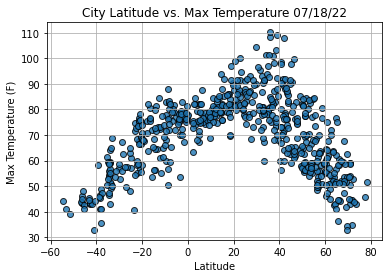

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

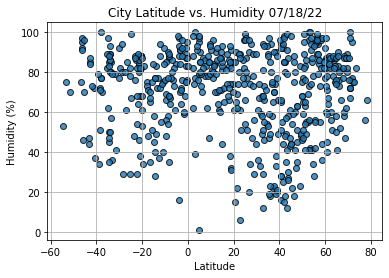

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

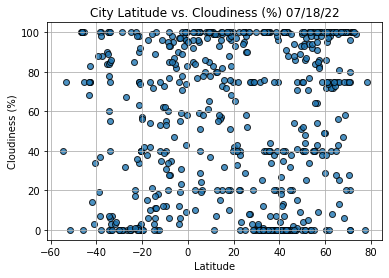

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

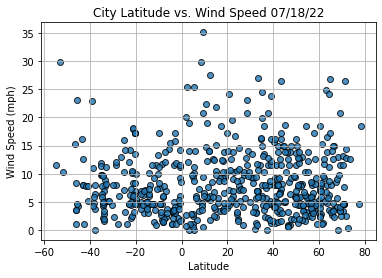

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()